In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [3]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

df1 = pd.read_csv(URL1)

In [4]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

df2 = pd.read_csv(URL2)

In [5]:
#df1 backup
df1_backup = df1.copy()

In [6]:
#df2 backup
df2_backup = df2.copy()

In [7]:
df1.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [8]:
df2.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### TASK 1
Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [9]:
Y =np.asarray(df1['Class'])

In [10]:
# print the first 5 values of Y
print("First 5 values of Y:", Y[:5])

First 5 values of Y: [0 0 0 0 0]


### TASK 2
Standardize the data in X then reassign it to the variable X using the transform provided below.

In [11]:
X = df2

# standardize the data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

### TASK 3
Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [12]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### TASK 4
Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [13]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [14]:
logreg_cv = GridSearchCV(lr, parameters, cv=5, scoring='accuracy', n_jobs=-1)
logreg_cv.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", logreg_cv.best_params_)
print("Best score for Logistic Regression:", logreg_cv.best_score_)

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.8342857142857143


We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.

### TASK 5
Calculate the accuracy on the test data using the method score

In [15]:
# Calculate the accuracy on the test data using the method score
logreg_accuracy = logreg_cv.score(X_test, y_test)
print("Logistic Regression accuracy on test data:", logreg_accuracy)

Logistic Regression accuracy on test data: 0.8333333333333334


Lets look at the confusion matrix

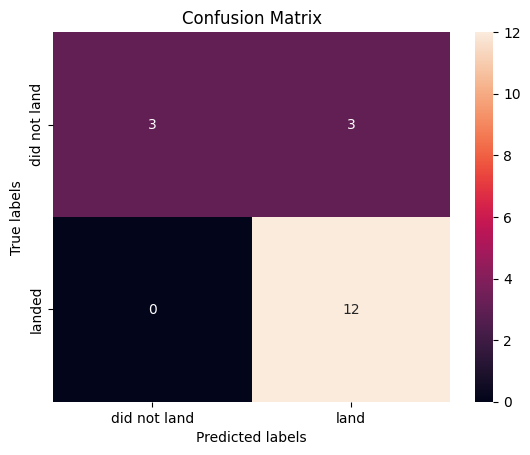

In [16]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)

### TASK 6
Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [17]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [18]:
logreg_cv_2 = GridSearchCV(svm, parameters, cv=10, scoring='accuracy', n_jobs=-1)
logreg_cv_2.fit(X_train, y_train)
print("Best parameters for SVM:", logreg_cv_2.best_params_)
print("Best score for SVM:", logreg_cv_2.best_score_)

Best parameters for SVM: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Best score for SVM: 0.8482142857142856


### TASK 7
Calculate the accuracy on the test data using the method score:

SVM accuracy on test data: 0.8333333333333334


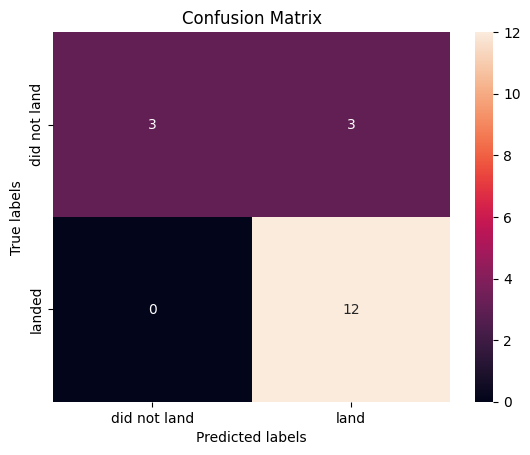

In [19]:
logreg_cv_2.score(X_test, y_test)
svm_accuracy = logreg_cv_2.score(X_test, y_test)
print("SVM accuracy on test data:", svm_accuracy)
yhat=logreg_cv_2.predict(X_test)
plot_confusion_matrix(y_test,yhat)

### TASK 8
Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [20]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', None],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [21]:
logreg_cv_3 = GridSearchCV(tree, parameters, cv=10, scoring='accuracy', n_jobs=-1)
logreg_cv_3.fit(X_train, y_train)
print("Best parameters for Decision Tree:", logreg_cv_3.best_params_)
print("Best score for Decision Tree:", logreg_cv_3.best_score_)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Best score for Decision Tree: 0.8892857142857142


### TASK 9
Calculate the accuracy of tree_cv on the test data using the method score:

Decision Tree accuracy on test data: 0.7222222222222222


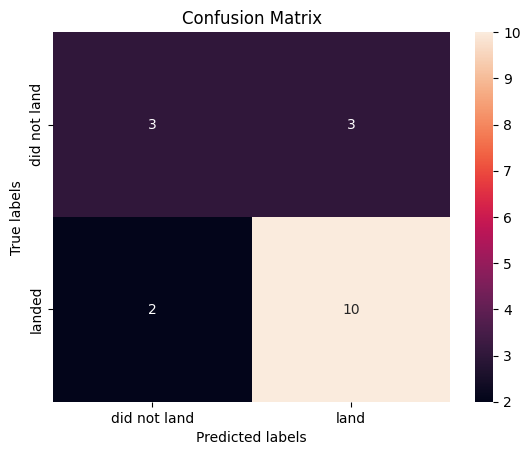

In [22]:
logreg_cv_3_accuracy = logreg_cv_3.score(X_test, y_test)
print("Decision Tree accuracy on test data:", logreg_cv_3_accuracy)
yhat=logreg_cv_3.predict(X_test)
plot_confusion_matrix(y_test,yhat)

### TASK 10
Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [23]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [24]:
logreg_cv_4 = GridSearchCV(KNN, parameters, cv=10, scoring='accuracy', n_jobs=-1)
logreg_cv_4.fit(X_train, y_train)
print("Best parameters for KNN:", logreg_cv_4.best_params_)
print("Best score for KNN:", logreg_cv_4.best_score_)

Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Best score for KNN: 0.8482142857142858


### TASK 11
Calculate the accuracy of knn_cv on the test data using the method score:

KNN accuracy on test data: 0.8333333333333334


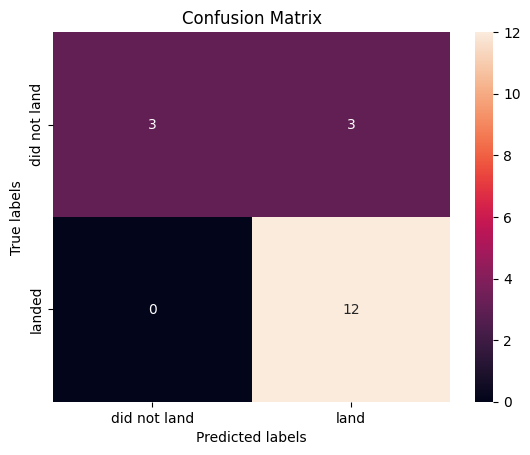

In [25]:
logreg_cv_4_accuracy = logreg_cv_4.score(X_test, y_test)
print("KNN accuracy on test data:", logreg_cv_4_accuracy)
yhat=logreg_cv_4.predict(X_test)
plot_confusion_matrix(y_test,yhat)

### TASK 12
Find the method performs best

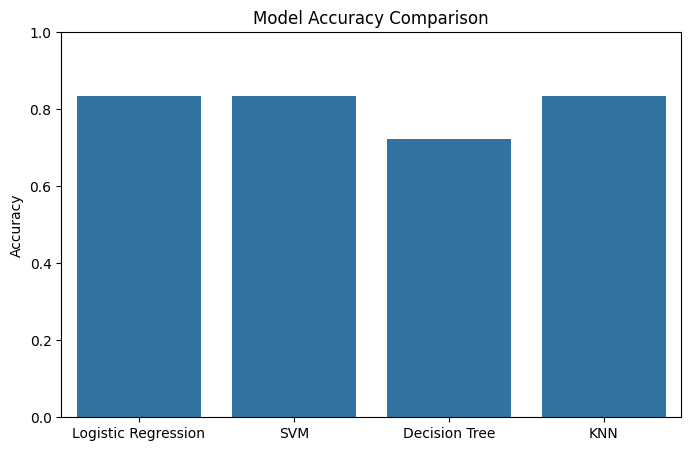

In [26]:
# Model names and their accuracies
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracies = [logreg_accuracy, svm_accuracy, logreg_cv_3_accuracy, logreg_cv_4_accuracy]

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=accuracies)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

The bar chart compares the accuracy of four classification models: Logistic Regression, SVM, Decision Tree, and KNN. According to the chart, Logistic Regression, SVM, and KNN all achieve the highest accuracy on the test data, each with an accuracy of approximately 0.83. The Decision Tree model has a lower accuracy of about 0.72. Therefore, Logistic Regression, SVM, and KNN are the best-performing models in this comparison, with no significant difference between their accuracies.

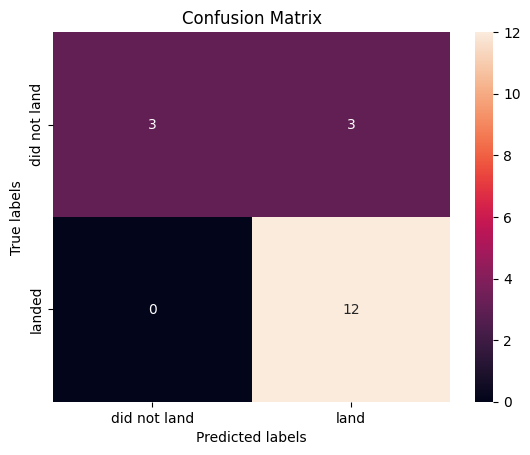

In [ ]:
# Show the confusion matrix for the best performing model (Logistic Regression, SVM, or KNN)
# All have the same accuracy, so we can use any of their predictions (e.g. KNN)
yhat_best = logreg_cv_4.predict(X_test)
plot_confusion_matrix(y_test, yhat_best)